# Coronal 1 Cortex Feature and Localization Analysis
This notebook demonstrates how to use `SpatialData` and `Bento` packages to analyze spatial transcriptomics data. 
- **Load Data:** Loading data into a SpatialData object
- **Shape and Point Features:** Calculate area, aspect ratio, and transcript density for soma and nucleus shapes.
- **Localization Analysis:** Compute localization patterns using RNAForest and plot Upset and Radar Plots


In [1]:
import warnings
import spatialdata as sd
import bento as bt

/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


## Load Data

Here we define the path to the Xenium data Zarr file and load it as a SpatialData object. We then prepare the data for Bento analysis.

In [2]:
sdata = sd.read_zarr("/tscc/nfs/home/bay001/projects/karen_synapse_20240529/permanent_data/dylan_work/sdata_aligned/coronal1_cortex.zarr")
# sdata = sd.read_zarr("/tscc/projects/ps-yeolab5/share/CNT/Naga/synapse/data/sdata_aligned/coronal1_cortex.zarr")

In [3]:
bt.io.prep(sdata)

INFO     Column `z` in `data` will be ignored since the data is 2D.                                                


  0%|          | 0/3 [00:00<?, ?it/s]

SpatialData object, with associated Zarr store: /tscc/projects/ps-yeolab3/bay001/karen_synapse_20240529/permanent_data/dylan_work/sdata_aligned/coronal1_cortex.zarr
├── Images
│     ├── 'dapi_if': DataArray[cyx] (1, 9191, 9488)
│     ├── 'morphology_focus': DataTree[cyx] (5, 4066, 3941), (5, 2033, 1970), (5, 1017, 985), (5, 508, 493), (5, 254, 246)
│     ├── 'post_if': DataArray[cyx] (1, 9191, 9488)
│     └── 'pre_if': DataArray[cyx] (1, 9191, 9488)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (4066, 3941), (2033, 1970), (1017, 985), (508, 493), (254, 246)
│     └── 'nucleus_labels': DataTree[yx] (4066, 3941), (2033, 1970), (1017, 985), (508, 493), (254, 246)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 14) (2D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (2186, 3) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (2127, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (2102, 2) (2D shapes)
└── Tables
      └

## Shape and Point Features

As an initial quality check of the data, this plot summarizes key metrics such as:

- **Soma and Nuclear Area:** Measuring the size of the cell soma and its nucleus to assess morphological differences.
- **Aspect Ratio:** Evaluating the shape of these regions to better understand structural organization.
- **Transcript Density:** Assessing the distribution of transcripts within the soma and nucleus, which provides insights into overall gene expression patterns.

This preliminary overview helps gauge the integrity and biological relevance of the Xenium data before further pattern classification.

In [4]:
bt.tl.shape_stats(sdata)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

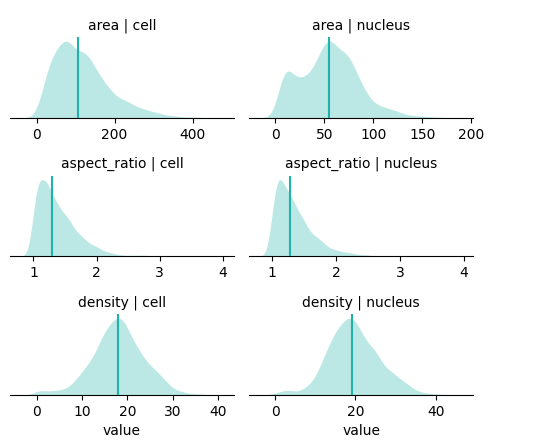

In [5]:
bt.pl.shape_stats(sdata)

## UpSet Plot of Transcript Localization Patterns

After computing localization patterns using the RNAForest model, each gene in every cell is classified into one of five distinct categories:

- **Cell Edge:** Transcripts localized near the cell membrane.
- **Cytoplasmic:** Transcripts predominantly found in the cytoplasm outside the nucleus.
- **Nuclear:** Transcripts mainly concentrated within the nucleus.
- **Nuclear Edge:** Transcripts enriched near the nuclear membrane.
- **None:** Transcripts without a clear localization pattern, suggesting random distribution.

The UpSet plot visualizes the global distribution of these patterns as well as the distribution by gene. It highlights the intersections of genes that share specific localization categories, offering an aggregated view of the data.


In [6]:
bt.tl.lp(sdata, num_workers=16)

Batches:   0%|          | 0/437 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation an

Done 🍱


Batches:   0%|          | 0/437 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation an

Done 🍱


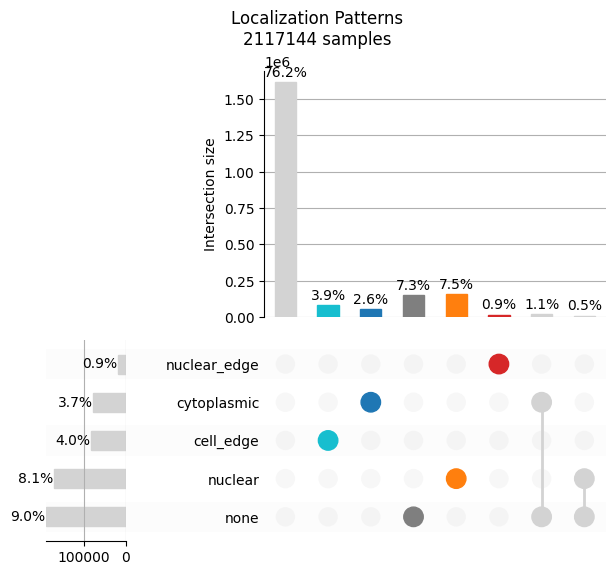

In [7]:
bt.pl.lp_dist(sdata)

## Radar Plot of Localization Strengths

The radar plot shows:

- **Point Location:** Quantifies the relative strength of each gene’s mapping to the localization categories: cell edge, cytoplasmic, nuclear, nuclear edge, and none.
- **Point Color:** Represents the mean log₂(count + 1) expression level of the gene.
- **Point Size:** Indicates the percentage of cells in which the gene is detected.

This visualization allows for a comprehensive comparison of gene-specific localization patterns, balancing both the intensity of localization and overall gene expression across the dataset.

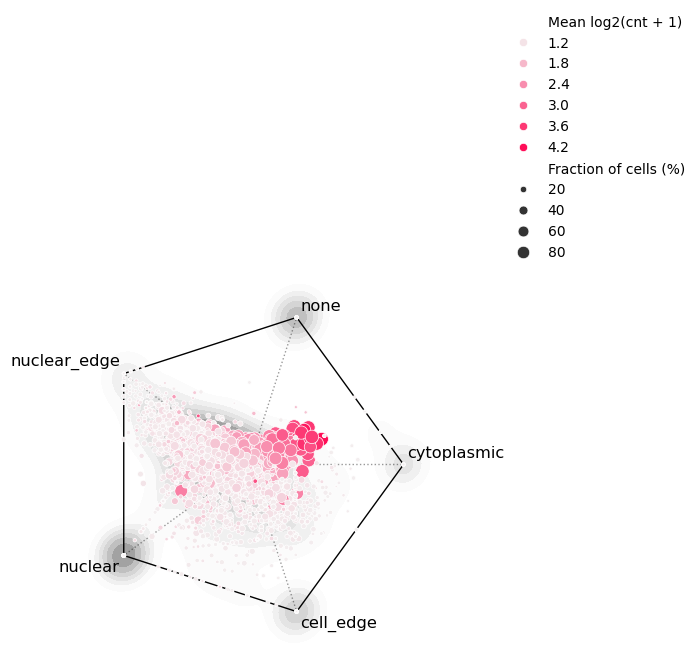

In [8]:
bt.pl.lp_genes(sdata)